## Installing Packages
I already install 2 packages "ydata_profiling" and "seaborn" using the `pip install` command. Then, I used `!pip list` to make sure the libraries are installed.

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('churn_data.csv')
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes


## Opening the csv file
I opened the *churn_data.csv* file using the `pd.read_csv` command. There are 7043 row customer information with 8 columns. Then using the `df.head()` and `df.tail()` commands, queried for the first and last data entries.

In [3]:
df.head()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,66,Yes,Two year,Bank transfer (automatic),105.65,6844.50,No


## Creating HTML file with auto-EDA analysis
the`pandas_profiling` library was deprecated, so I used the new ydata_profiling for auto-EDA analysis.  

In [6]:
report = ProfileReport(df)
report.to_file('churn_eda.html')

Export report to file: 100%|█████████████████████| 1/1 [00:00<00:00, 430.63it/s]


## Exploring the dataset
With the `df.info` command, I can see that the dataset has 8 columns, 3 datatypes, 7043 non-null entries, and 440.3+ KB of memory usage.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      7043 non-null   object 
 1   tenure          7043 non-null   int64  
 2   PhoneService    7043 non-null   object 
 3   Contract        7043 non-null   object 
 4   PaymentMethod   7043 non-null   object 
 5   MonthlyCharges  7043 non-null   float64
 6   TotalCharges    7032 non-null   float64
 7   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


The `df.describe()` command returns various statistical measures of the dataset such as the mean, standard deviation, etc.

In [6]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


the `df.columns` command shows the names and datatype of the column. there are 8 string columns such as customerID, tenure, PhoneService, Contract, PaymentMethod, MonthlyCharges, TotalCharges, and Churn.

In [7]:
df.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Using brackets, I can query individual columns entries. 

In [8]:
df['PaymentMethod']

0                Electronic check
1                    Mailed check
2                    Mailed check
3       Bank transfer (automatic)
4                Electronic check
                  ...            
7038                 Mailed check
7039      Credit card (automatic)
7040             Electronic check
7041                 Mailed check
7042    Bank transfer (automatic)
Name: PaymentMethod, Length: 7043, dtype: object

Using the `value.counts()` dataframe method, I counted each types of entries for the PaymentMethod column. Then I used the `unique()` method to display the unique entries in the PaymentMethod column.

In [9]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [10]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

## Generating bar plots


<Axes: >

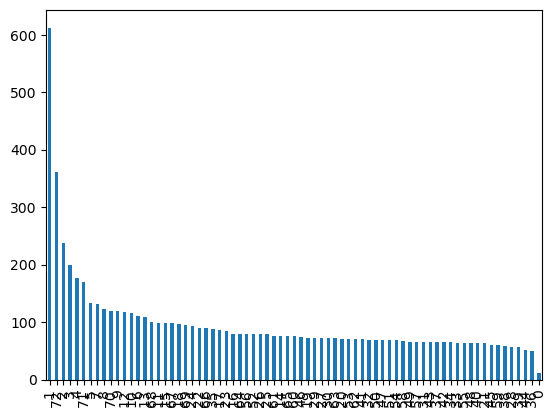

In [11]:
df['tenure'].value_counts().plot.bar()

<Axes: >

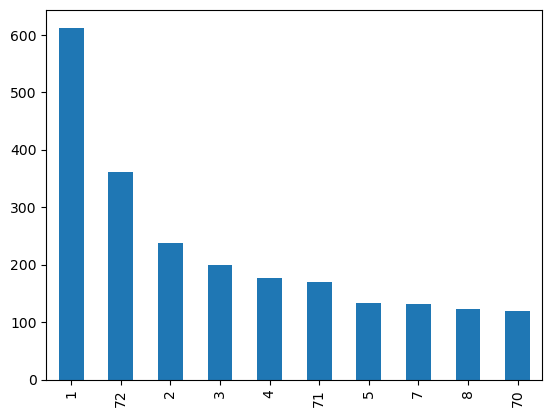

In [12]:
df['tenure'].value_counts()[:10].plot.bar()

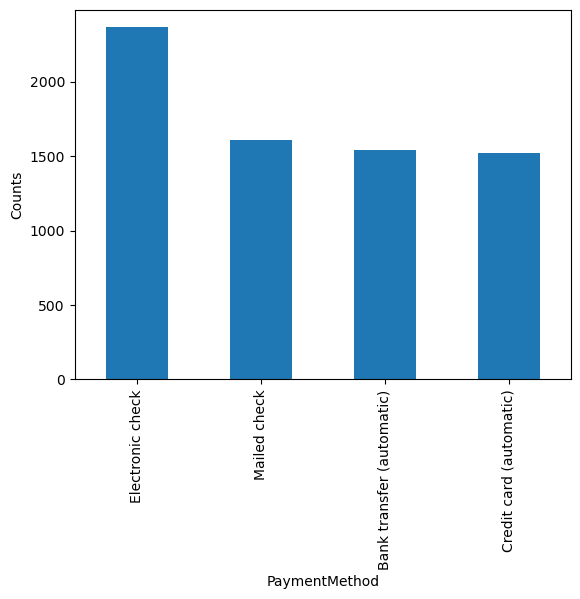

In [13]:
df['PaymentMethod'].value_counts().plot.bar()
plt.xlabel('PaymentMethod')
_ = plt.ylabel('Counts')

## Generating histograms

<Axes: >

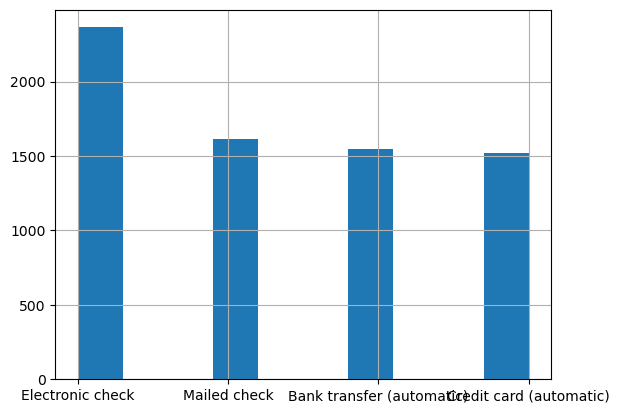

In [14]:
df['PaymentMethod'].hist()

<Axes: >

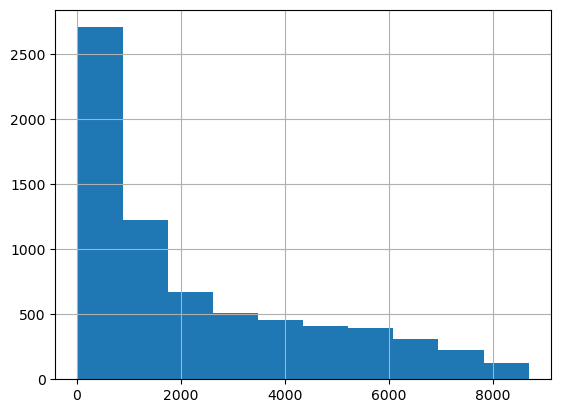

In [15]:
df['TotalCharges'].hist()

<Axes: ylabel='Frequency'>

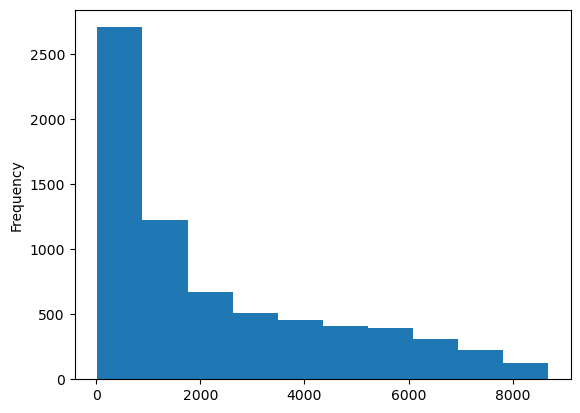

In [16]:
df['TotalCharges'].plot.hist()

## Generating scatter plots

<Axes: xlabel='TotalCharges', ylabel='Churn'>

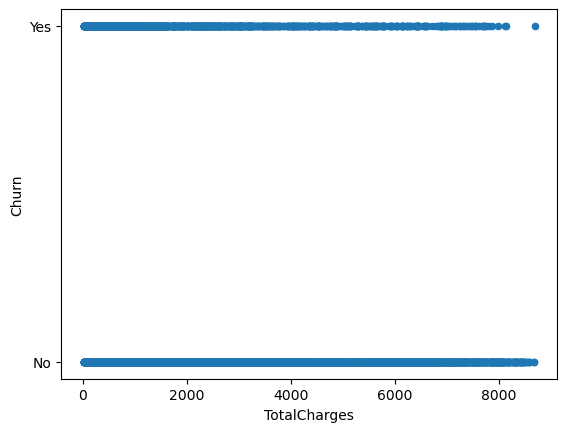

In [17]:
df.plot.scatter(x='TotalCharges', y='Churn')

## Filtering data

In [18]:
over_median_tenure = df[df['tenure'] > df['tenure'].median()].copy()

In [19]:
df['tenure'] > df['tenure'].median()

0       False
1        True
2       False
3        True
4       False
        ...  
7038    False
7039     True
7040    False
7041    False
7042     True
Name: tenure, Length: 7043, dtype: bool

In [20]:
over_median_tenure_tcharge = df[(df['tenure'] > df['tenure'].median()) & (df['TotalCharges'] > df['TotalCharges'].median())].copy()

In [32]:
over_median_tenure_tcharge

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9,6388-TABGU,62,Yes,One year,Bank transfer (automatic),56.15,3487.95,No
12,8091-TTVAX,58,Yes,One year,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,49,Yes,Month-to-month,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,38,Yes,Month-to-month,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,67,Yes,Month-to-month,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,72,Yes,Two year,Bank transfer (automatic),21.15,1419.40,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No


In [21]:
df.shape

(7043, 8)

In [22]:
churn_df = df[df['Churn'] == 'Yes']
churn_df['Contract'].value_counts() / churn_df.shape[0]

Month-to-month    0.885500
One year          0.088818
Two year          0.025682
Name: Contract, dtype: float64

In [23]:
churn_df = df[df['Churn'] == 'No']
churn_df['Contract'].value_counts() / churn_df.shape[0]

Month-to-month    0.429068
Two year          0.318322
One year          0.252609
Name: Contract, dtype: float64

## Using `Seaborn`

In [24]:
import phik
import seaborn as sns

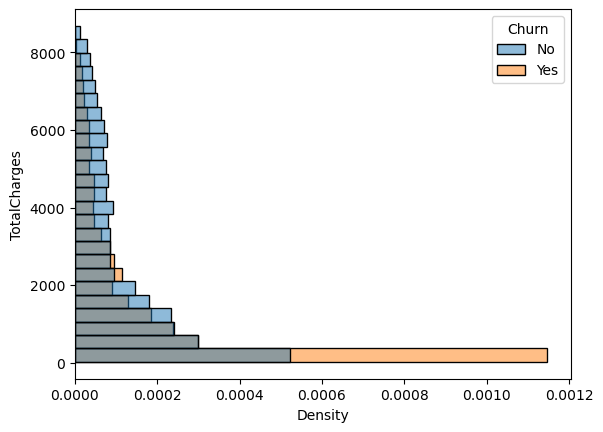

In [25]:
_ = sns.histplot(data=df, y='TotalCharges', hue='Churn', stat='density', common_norm=False)

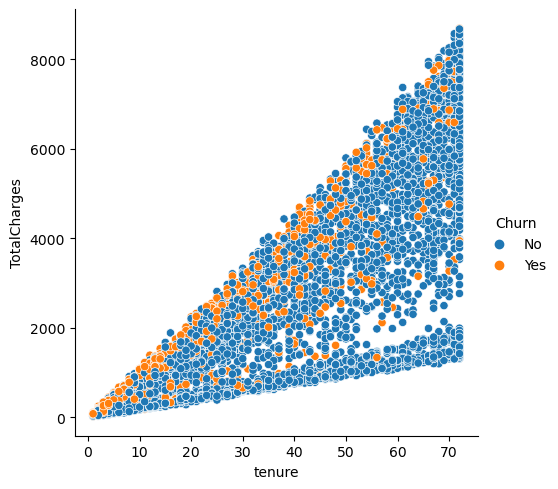

In [26]:
sns.relplot(data=df, x='tenure', y='TotalCharges', hue='Churn')

/tmp/ipykernel_36998/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

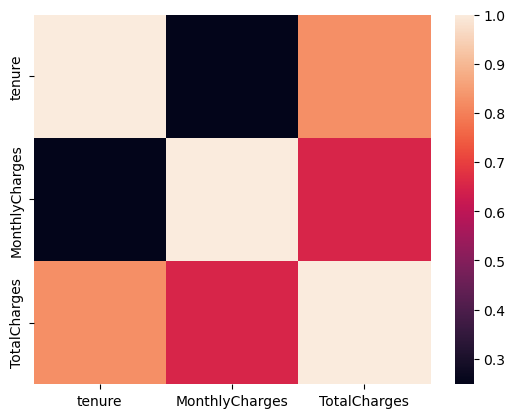

In [27]:
sns.heatmap(df.corr())

interval columns not set, guessing: ['tenure', 'MonthlyCharges', 'TotalCharges']


/home/plato/.local/lib/python3.11/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable customerID is large: 7043. Are you sure this is not an interval variable? Analysis for pairs of variables including customerID can be slow.
  warnings.warn(


<Axes: >

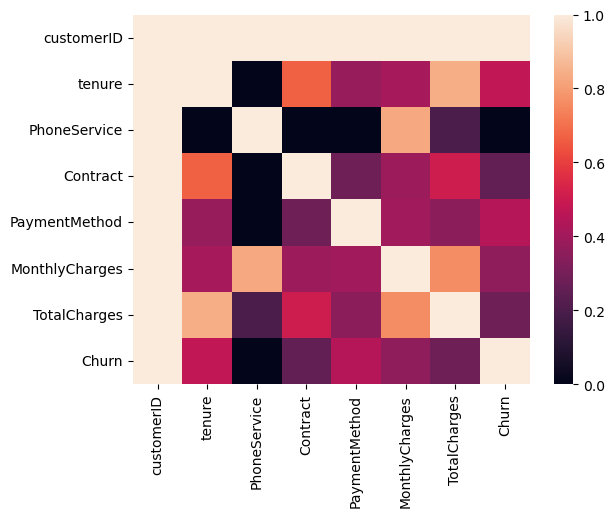

In [28]:
sns.heatmap(df.phik_matrix())

# Analysis
The `churn_data.csv` file has 7043 row customer information with 8 columns. The column names are customerID, tenure, PhoneService, Contract, PaymentMethod, MonthlyCharges, TotalCharges, and Churn. There are 3 datatypes, 7043 non-null entries, and 440.3+ KB of memory usage. The dataset has 11 missing cells which is smaller than 0.1% of the whole data.

For the numerical columns, the means are 32.4 for tenure, 64.8 for monthly charges, and 2283.3 for total charges. The standard deviations are 24.6 for tenure, 30.0 for monthly charges, and 2266.8 for total charges. There are high standard deviations for the numerical columns because the minimum and maximum values have high discrepancies.

For the categorical columns, I can see that people paid with electronic checks the most with over 2000 counts. Conversely, other payment methods are used similarly with around 1500 counts. Additionally, customers usually churn at the start of their tenure.